In [479]:
import pandas as pd 


In [480]:
df=pd.read_csv('delivery.csv')

C:\Users\ACER\AppData\Local\Temp\ipykernel_11404\3424143440.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('delivery.csv')


In [481]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [483]:
df.isnull().sum()*100

ID                                  0
Delivery_person_ID                  0
Delivery_person_Age            185400
Delivery_person_Ratings        190800
Restaurant_latitude                 0
Restaurant_longitude                0
Delivery_location_latitude          0
Delivery_location_longitude         0
Order_Date                          0
Time_Orderd                    173100
Time_Order_picked                   0
Weather_conditions              61600
Road_traffic_density            60100
Vehicle_condition                   0
Type_of_order                       0
Type_of_vehicle                     0
multiple_deliveries             99300
Festival                        22800
City                           120000
Time_taken (min)                    0
dtype: int64

In [484]:
#changing datatype 
# Replace NaN values with a specific value (e.g., 0)
df['Delivery_person_Age'].fillna(0, inplace=True)
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)  # Convert the column to integer type


In [485]:
#converting to datetime datatype 
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')




In [486]:
# Convert to datetime, errors='coerce' will convert problematic values to NaT (Not a Time)
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')

# Now you can handle NaT values or drop them as per your requirement



C:\Users\ACER\AppData\Local\Temp\ipykernel_11404\1969610011.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')


In [487]:
# Convert to datetime, errors='coerce' will convert problematic values to NaT (Not a Time)
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')

# Now you can handle NaT values or drop them as per your requirement



C:\Users\ACER\AppData\Local\Temp\ipykernel_11404\1056594953.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')


In [488]:
# Linear interpolation
df['Time_Orderd'].interpolate(method='linear', inplace=True)
df['Time_Order_picked'].interpolate(method='linear', inplace=True)
df['Time_taken (min)'].interpolate(method='linear', inplace=True)



In [489]:
df['Delivery_person_Age']=df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median())
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())
df['Time_Order_picked']=df['Time_Order_picked'].fillna(df['Time_Order_picked'].median())
df['multiple_deliveries']=df['multiple_deliveries'].fillna(df['multiple_deliveries'].median())








In [490]:
# Fill null values with the mode
mode_category = df['Weather_conditions'].mode()[0]
df['Weather_conditions'].fillna(mode_category, inplace=True)
# Fill null values with the mode
mode_category = df['Road_traffic_density'].mode()[0]
df['Road_traffic_density'].fillna(mode_category, inplace=True)
# Fill null values with the mode
mode_category = df['Festival'].mode()[0]
df['Festival'].fillna(mode_category, inplace=True)
# Fill null values with the mode
mode_category = df['City'].mode()[0]
df['City'].fillna(mode_category, inplace=True)







In [491]:

df['Time_taken (min)'].unique

<bound method Series.unique of 0         46
1         23
2         21
3         20
4         41
        ... 
45579     32
45580     36
45581     16
45582     26
45583    36A
Name: Time_taken (min), Length: 45584, dtype: object>

In [509]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  int32         
 3   Delivery_person_Ratings      45584 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  45584 non-null  datetime64[ns]
 10  Time_Order_picked            45584 non-null  datetime64[ns]
 11  Weather_conditions           45584 non-nu

In [493]:
df.duplicated().sum()

0

In [494]:
#lets drop th id columns 
df=df.drop(columns=['ID','Delivery_person_ID'],axis=1)

In [495]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,2024-02-21 21:55:00,2024-02-21 22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,2024-02-21 14:55:00,2024-02-21 15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,2024-02-21 17:30:00,2024-02-21 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,2024-02-21 09:20:00,2024-02-21 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2024-02-21 19:50:00,2024-02-21 20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2024-02-21 11:35:00,2024-02-21 11:45:00,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2024-02-21 19:55:00,2024-02-21 20:10:00,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2024-02-21 23:50:00,2024-02-21 16:55:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2024-02-21 13:35:00,2024-02-21 13:40:00,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [496]:
df.to_csv("final_data4.csv", index=False, header=True)

In [497]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,2024-02-21 21:55:00,2024-02-21 22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,2024-02-21 14:55:00,2024-02-21 15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,2024-02-21 17:30:00,2024-02-21 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,2024-02-21 09:20:00,2024-02-21 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2024-02-21 19:50:00,2024-02-21 20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [498]:
#segregate numerical and categorical columns 
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Numerical columns:',numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Vehicle_condition', 'multiple_deliveries'],
      dtype='object')
Categorical Columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')


In [499]:
df[categorical_columns].describe()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Time_taken (min)
count,45584,45584,45584,45584,45584,45584,45584
unique,6,4,4,4,2,3,91
top,Fog,Low,Snack,motorcycle,No,Metropolitian,25
freq,8269,16077,11530,26429,44688,35287,1506


In [500]:
df['Weather_conditions'].value_counts()

Weather_conditions
Fog           8269
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [501]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       16077
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

In [502]:
df['Type_of_order'].value_counts()

Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

In [503]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: int64

In [504]:
df['Festival'].value_counts()

Festival
No     44688
Yes      896
Name: count, dtype: int64

In [505]:
df['City'].value_counts()

City
Metropolitian    35287
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

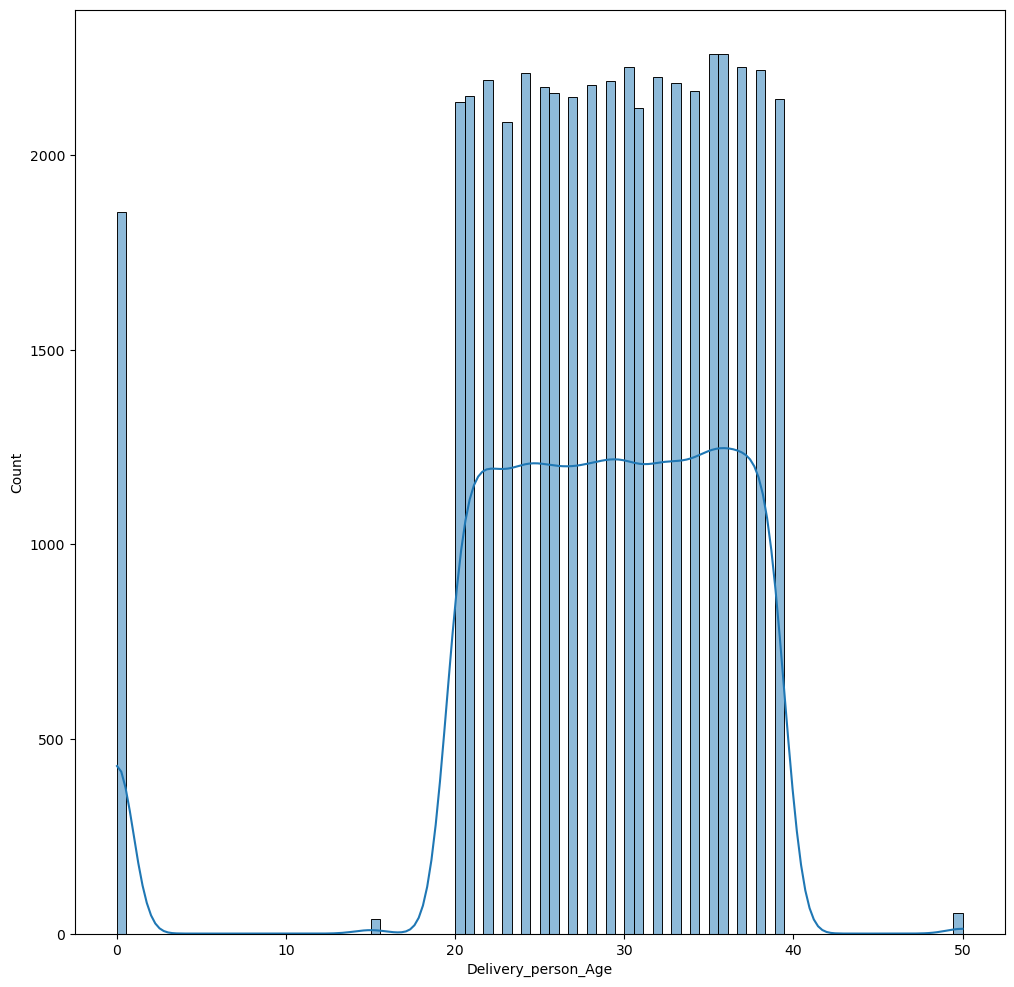

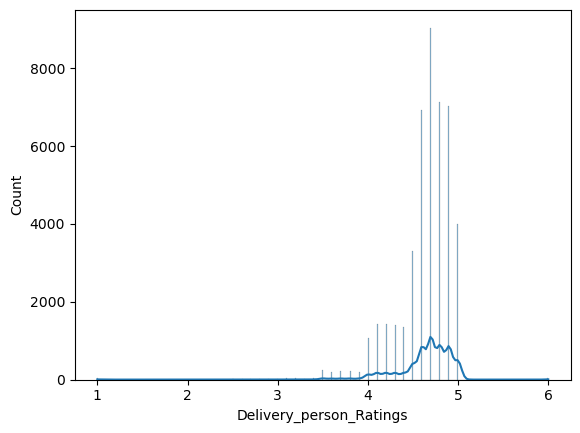

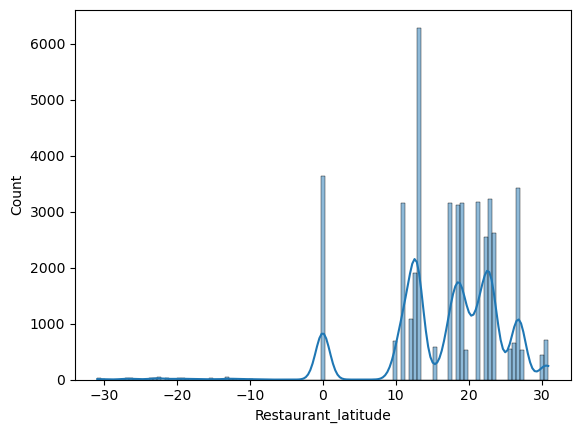

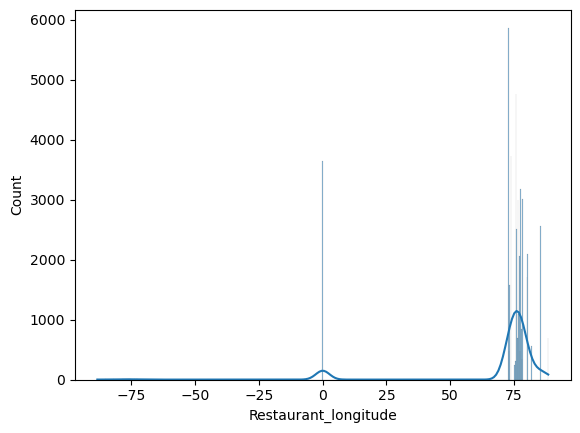

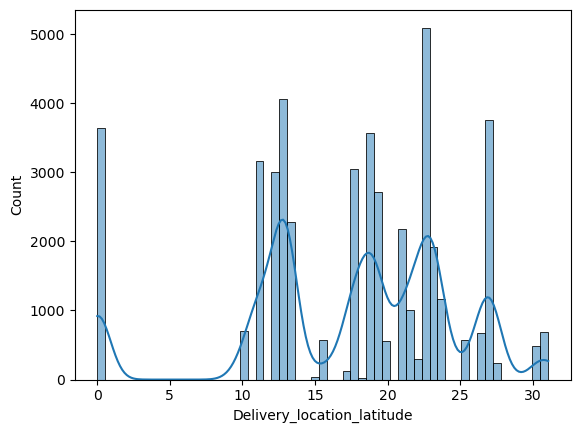

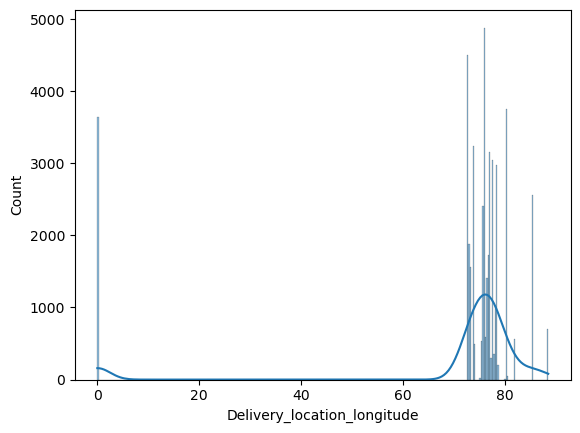

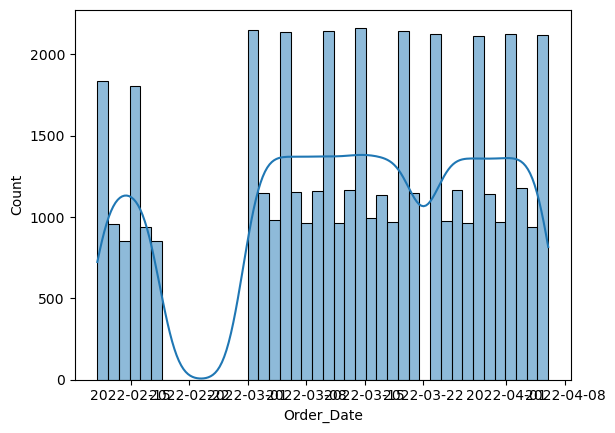

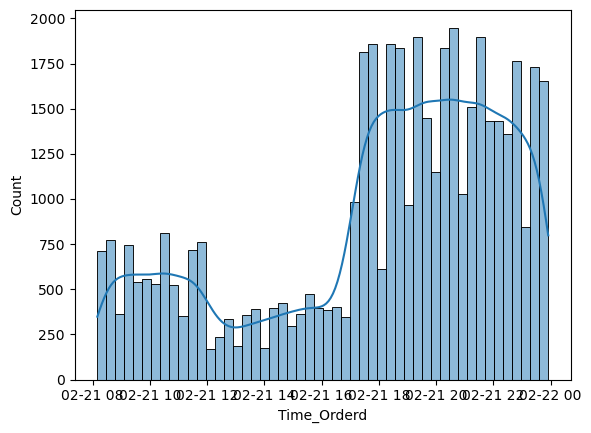

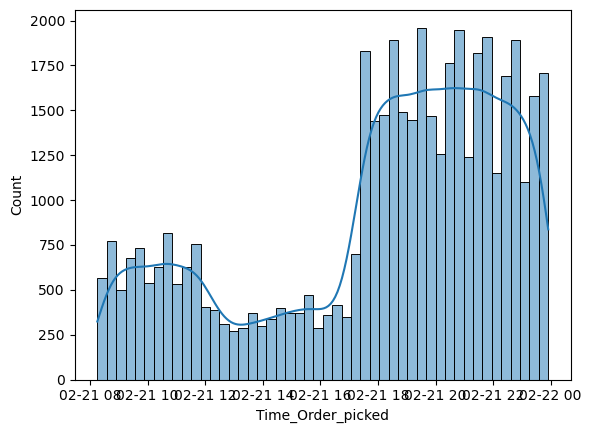

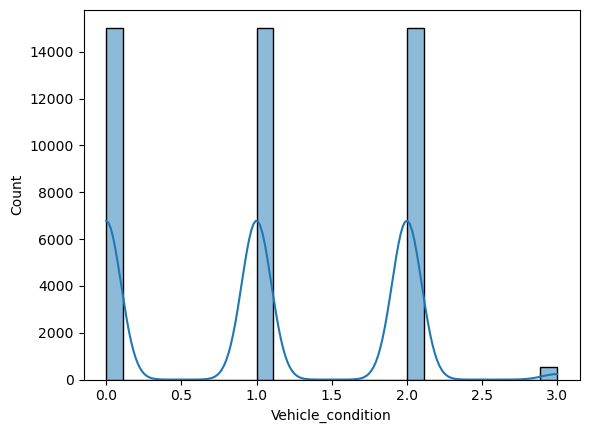

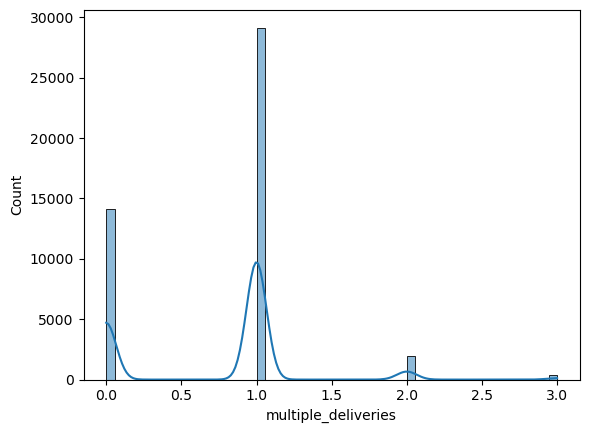

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

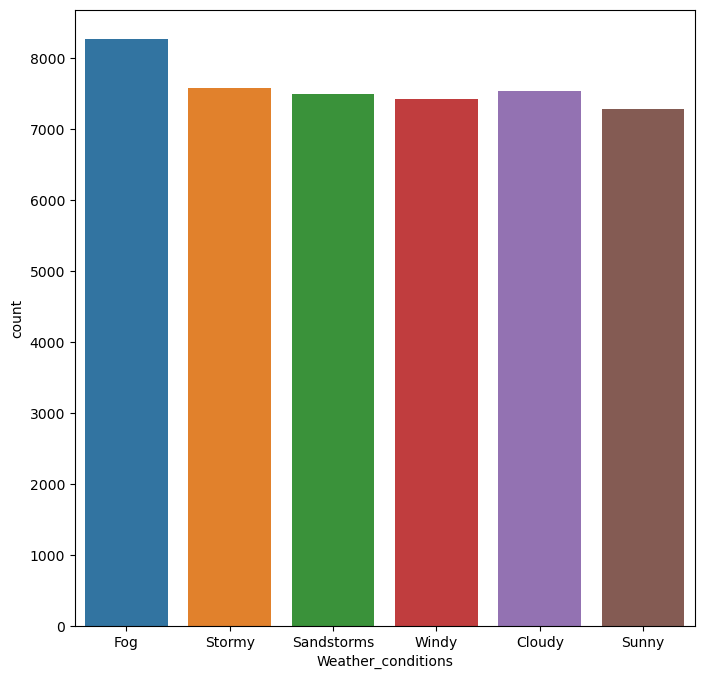

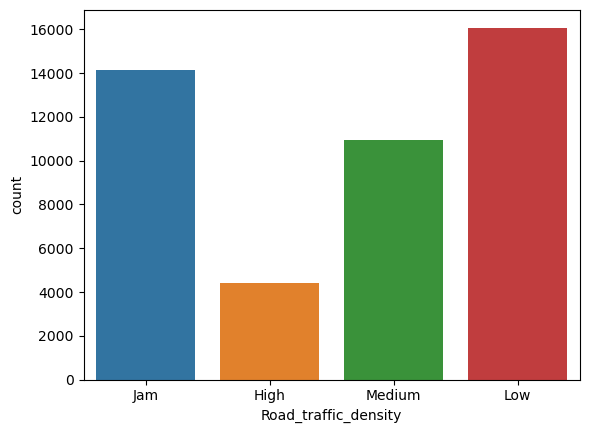

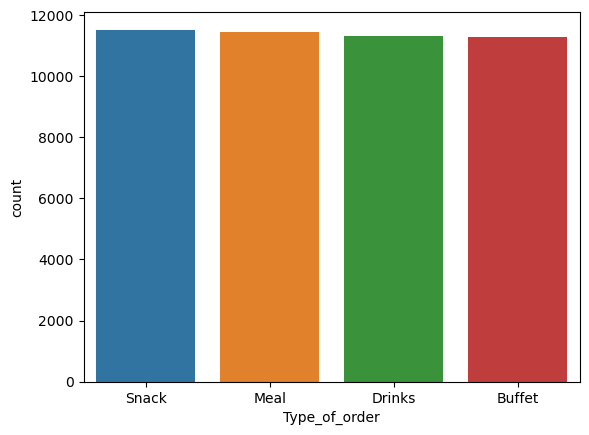

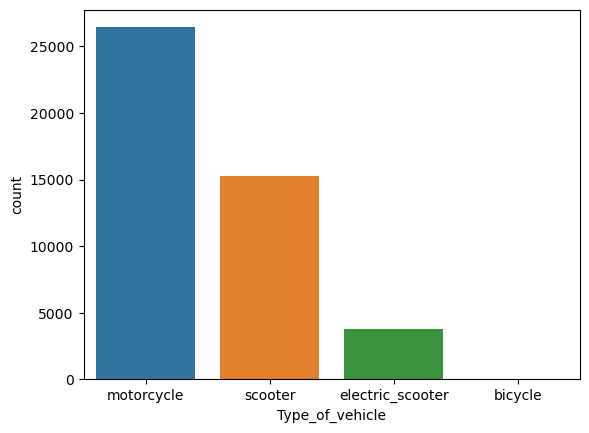

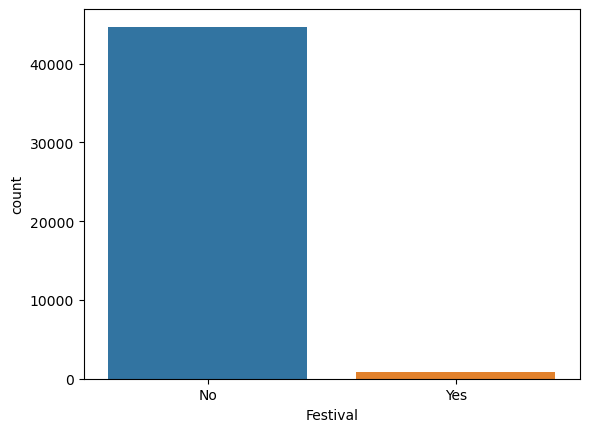

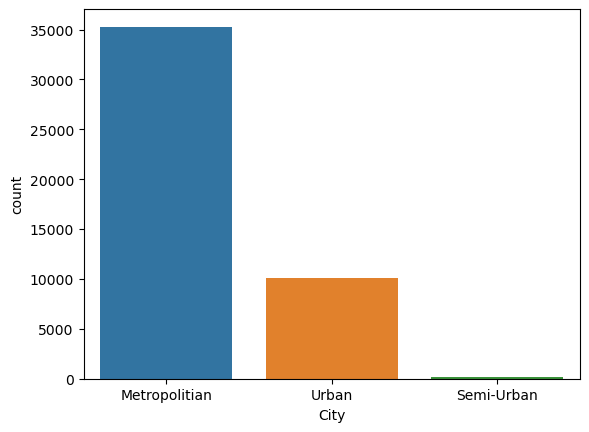

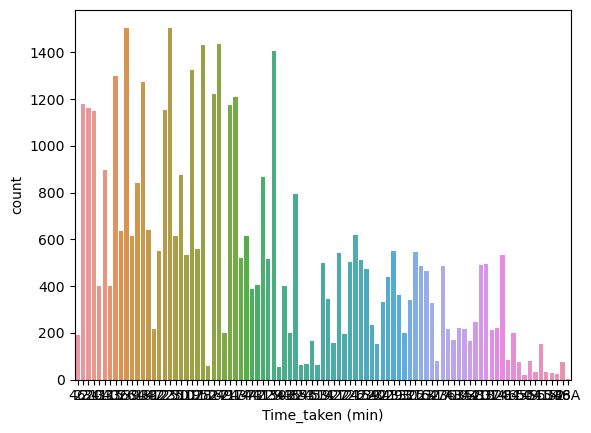

In [507]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
x=0
for i in categorical_columns:
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

In [508]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,2024-02-21 21:55:00,2024-02-21 22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,2024-02-21 14:55:00,2024-02-21 15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,2024-02-21 17:30:00,2024-02-21 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,2024-02-21 09:20:00,2024-02-21 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2024-02-21 19:50:00,2024-02-21 20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
